<a href="https://colab.research.google.com/github/VardhanYadav/Information-visualisation/blob/main/Workshop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

data = pd.DataFrame({'category': ['A', 'B', 'C', 'D'] * 25, 'Value': np.random.randn(100)})
satisfied_sample = data.groupby('category', group_keys=False).apply(lambda x: x.sample(2))
print("Satisfied Sample:\n", satisfied_sample)


Satisfied Sample:
    category     Value
52        A -0.333112
84        A  0.053933
17        B -0.028707
37        B  0.716833
58        C -1.457525
90        C  0.874880
35        D -0.862675
99        D -2.153173


In [ ]:
import random

cluster = [list(range(1, 26)), list(range(26, 51)), list(range(51, 76))]
cluster_sample = random.choice(cluster)
print("cluster sample: ", cluster_sample)

cluster sample:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [ ]:
import pandas as pd
import numpy as np
import random
data=pd.DataFrame({'Values:':np.random.randn(75)})
summary=data.describe()
print("summary statistics: \n", summary)

summary statistics: 
          Values:
count  75.000000
mean    0.041961
std     0.926659
min    -2.220382
25%    -0.640230
50%     0.051390
75%     0.669188
max     2.495424


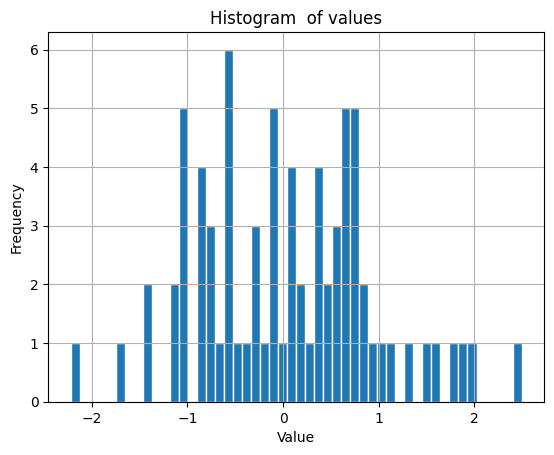

In [ ]:
import matplotlib.pyplot as pt
data['Values:'].hist(bins=50, edgecolor='white') # Access the correct column 'Values:'
pt.title('Histogram  of values')
pt.xlabel('Value')
pt.ylabel('Frequency')
pt.show()

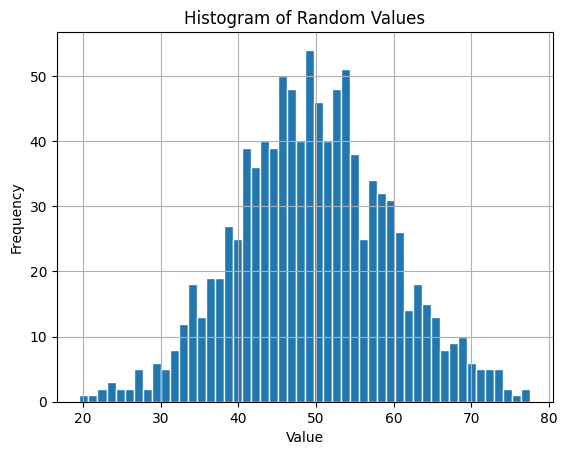

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)  # For reproducibility
random_values = np.random.randn(1000) * 10 + 50  # Normal distribution centered at 50

# Create a DataFrame with the random values
data = pd.DataFrame({'Values:': random_values})

# Plotting the histogram
data['Values:'].hist(bins=50, edgecolor='white')
plt.title('Histogram of Random Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

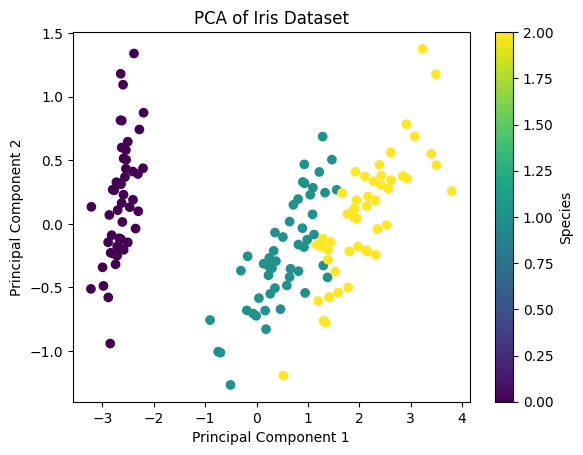

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the data
reduced_data = pca.fit_transform(iris.data)

# Create a scatter plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Species')
plt.show()

# Transform the data again (this step is optional since it's already done)
x_pca = pca.transform(iris.data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     

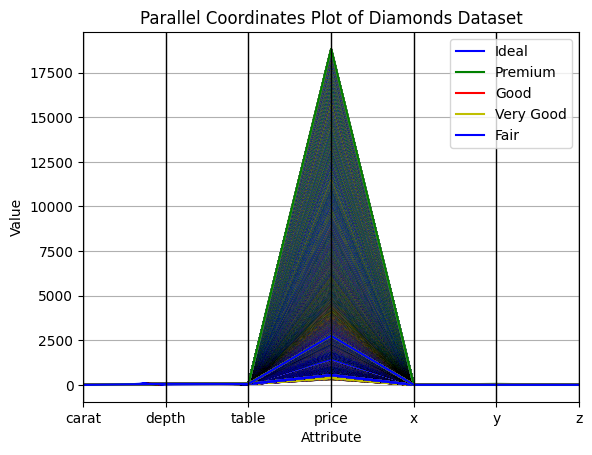

In [ ]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')

# Step 2: Inspect the data
print(data.info())  # Check data types and non-null counts
print(data.head())  # Preview the data

# Step 3: Prepare the data
# We will use 'cut' as the class for grouping
# Ensure we only select numeric columns for the plot
numeric_data = data.select_dtypes(include=['float64', 'int64']).copy()
numeric_data['class'] = data['cut']  # Use 'cut' as the class

# Step 4: Check for missing values
if numeric_data.isnull().values.any():
    print("Missing values found. Filling missing values with mean.")
    numeric_data.fillna(numeric_data.mean(), inplace=True)

# Step 5: Create the plot
try:
    parallel_coordinates(numeric_data, 'class', color=['b', 'g', 'r', 'y'])
    plt.title('Parallel Coordinates Plot of Diamonds Dataset')
    plt.xlabel('Attribute')
    plt.ylabel('Value')
    plt.show()
except ValueError as e:
    print(f"ValueError: {e}")